In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot

In [92]:
# Importing the datasets
df_original = pd.read_csv("../waters_datasets/Cleaned_Datasets/testing_data_2.csv", encoding= 'unicode_escape')

df_new = pd.read_csv("./list_of_stations.csv", encoding = 'unicode_escape')

In [93]:
df_new.dtypes

Water Quality\nStation Code               float64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                   object
Longitude                                 float64
Unnamed: 7                                float64
dtype: object

In [94]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude,Unnamed: 7
0,14.0,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613,NaN
1,25.0,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839,NaN
2,26.0,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519,NaN
3,30.0,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627,NaN
4,1174.0,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.8483,78.034942,NaN


In [95]:
#Drop random column
df_new.drop("Unnamed: 7", inplace = True, axis = 1)

In [96]:
df_new.shape

(4205, 7)

<AxesSubplot:>

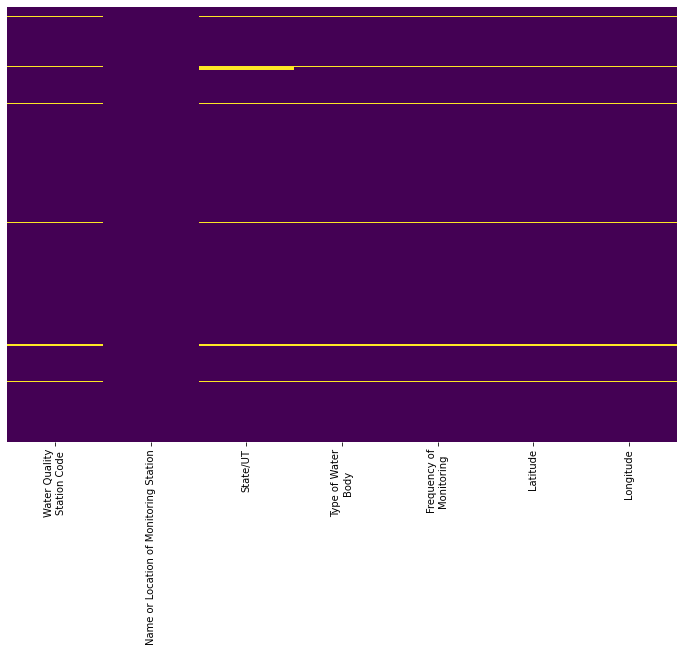

In [97]:
# checking for missing values in the dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [98]:
#drop all rows with missing values
df_new.dropna(axis = 0, inplace = True)

In [99]:
#Change types of latitude and station code to float and int
df_new["Latitude"] = pd.to_numeric(df_new["Latitude"], errors='coerce')
df_new["Water Quality\nStation Code"] = df_new["Water Quality\nStation Code"].astype(int)

In [100]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude
0,14,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613
1,25,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839
2,26,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519
3,30,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627
4,1174,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.848300,78.034942


In [101]:
df_original.shape

(1148, 14)

In [102]:
df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,2
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,1
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,2
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,2
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,2


<AxesSubplot:>

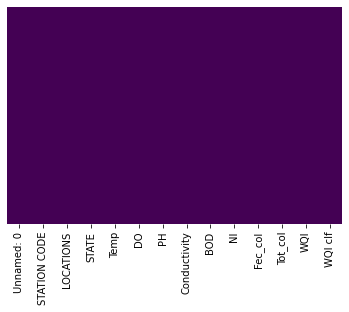

In [103]:
sns.heatmap(df_original.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Creating columns for longitude and latitude in the original dataset.

In [105]:
latitude = [0.0 for x in range(1148)]
df_original["latitude"] = latitude
longitude = [0.0 for x in range(1148)]
df_original["longitude"] = longitude

df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,latitude,longitude
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,2,0.0,0.0
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,1,0.0,0.0
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,2,0.0,0.0
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,2,0.0,0.0
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,2,0.0,0.0


In [106]:
df_original = df_original.drop(["Unnamed: 0","LOCATIONS","STATE","Temp","DO","PH","Conductivity","WQI","BOD","NI","Fec_col","Tot_col"], axis = 1)

In [107]:
df_original.dtypes

STATION CODE      int64
WQI clf           int64
latitude        float64
longitude       float64
dtype: object

Rename the columns

In [108]:
# Changing column names
df_original = df_original.rename(columns={"STATION CODE":"S.Code"})

In [109]:
df_original.dtypes

S.Code         int64
WQI clf        int64
latitude     float64
longitude    float64
dtype: object

In [110]:
print(df_original.loc[(df_original['longitude'] == 0) & (df_original['S.Code'] == 1533.0)])

     S.Code  WQI clf  latitude  longitude
835    1533        2       0.0        0.0


Remove the duplicates from the dataframe. We will keep just one instance from the instances that have the same station code to simplify the  process.

In [111]:
df_original = df_original.drop_duplicates("S.Code")

Group by the station code becuase there are multiple instances that have the same station code but different measurements.

In [112]:
station_code_groups = df_original.groupby('S.Code')

In [113]:
for name, group in station_code_groups:
    print(name)
    print(group)
    print("\n")

1
     S.Code  WQI clf  latitude  longitude
246       1        0       0.0        0.0


2
     S.Code  WQI clf  latitude  longitude
247       2        0       0.0        0.0


3
     S.Code  WQI clf  latitude  longitude
996       3        1       0.0        0.0


4
     S.Code  WQI clf  latitude  longitude
235       4        1       0.0        0.0


5
     S.Code  WQI clf  latitude  longitude
236       5        0       0.0        0.0


7
     S.Code  WQI clf  latitude  longitude
266       7        1       0.0        0.0


9
     S.Code  WQI clf  latitude  longitude
275       9        2       0.0        0.0


10
     S.Code  WQI clf  latitude  longitude
277      10        1       0.0        0.0


11
     S.Code  WQI clf  latitude  longitude
413      11        0       0.0        0.0


12
     S.Code  WQI clf  latitude  longitude
374      12        0       0.0        0.0


13
     S.Code  WQI clf  latitude  longitude
385      13        1       0.0        0.0


14
     S.Code  WQI clf  lat

349    1081        0       0.0        0.0


1082
     S.Code  WQI clf  latitude  longitude
350    1082        0       0.0        0.0


1083
     S.Code  WQI clf  latitude  longitude
351    1083        0       0.0        0.0


1084
     S.Code  WQI clf  latitude  longitude
352    1084        0       0.0        0.0


1086
    S.Code  WQI clf  latitude  longitude
21    1086        2       0.0        0.0


1087
    S.Code  WQI clf  latitude  longitude
22    1087        2       0.0        0.0


1088
    S.Code  WQI clf  latitude  longitude
40    1088        2       0.0        0.0


1089
    S.Code  WQI clf  latitude  longitude
39    1089        2       0.0        0.0


1090
    S.Code  WQI clf  latitude  longitude
43    1090        2       0.0        0.0


1091
     S.Code  WQI clf  latitude  longitude
480    1091        1       0.0        0.0


1092
     S.Code  WQI clf  latitude  longitude
567    1092        0       0.0        0.0


1093
     S.Code  WQI clf  latitude  longitude
563    10

393    1219        1       0.0        0.0


1221
     S.Code  WQI clf  latitude  longitude
244    1221        0       0.0        0.0


1222
     S.Code  WQI clf  latitude  longitude
250    1222        0       0.0        0.0


1226
     S.Code  WQI clf  latitude  longitude
997    1226        1       0.0        0.0


1227
     S.Code  WQI clf  latitude  longitude
237    1227        1       0.0        0.0


1228
     S.Code  WQI clf  latitude  longitude
238    1228        0       0.0        0.0


1229
     S.Code  WQI clf  latitude  longitude
231    1229        1       0.0        0.0


1230
     S.Code  WQI clf  latitude  longitude
230    1230        1       0.0        0.0


1231
     S.Code  WQI clf  latitude  longitude
234    1231        1       0.0        0.0


1232
     S.Code  WQI clf  latitude  longitude
229    1232        1       0.0        0.0


1233
     S.Code  WQI clf  latitude  longitude
228    1233        1       0.0        0.0


1234
     S.Code  WQI clf  latitude  longitude

20    1389        2       0.0        0.0


1391
     S.Code  WQI clf  latitude  longitude
704    1391        0       0.0        0.0


1393
     S.Code  WQI clf  latitude  longitude
534    1393        1       0.0        0.0


1396
     S.Code  WQI clf  latitude  longitude
735    1396        1       0.0        0.0


1397
     S.Code  WQI clf  latitude  longitude
958    1397        1       0.0        0.0


1398
     S.Code  WQI clf  latitude  longitude
959    1398        1       0.0        0.0


1399
     S.Code  WQI clf  latitude  longitude
547    1399        1       0.0        0.0


1400
     S.Code  WQI clf  latitude  longitude
550    1400        1       0.0        0.0


1401
     S.Code  WQI clf  latitude  longitude
734    1401        0       0.0        0.0


1403
     S.Code  WQI clf  latitude  longitude
681    1403        1       0.0        0.0


1404
     S.Code  WQI clf  latitude  longitude
682    1404        0       0.0        0.0


1405
     S.Code  WQI clf  latitude  longitude


900    1559        1       0.0        0.0


1560
     S.Code  WQI clf  latitude  longitude
901    1560        0       0.0        0.0


1561
     S.Code  WQI clf  latitude  longitude
902    1561        2       0.0        0.0


1562
     S.Code  WQI clf  latitude  longitude
903    1562        1       0.0        0.0


1563
     S.Code  WQI clf  latitude  longitude
596    1563        2       0.0        0.0


1564
     S.Code  WQI clf  latitude  longitude
597    1564        1       0.0        0.0


1565
     S.Code  WQI clf  latitude  longitude
589    1565        1       0.0        0.0


1566
     S.Code  WQI clf  latitude  longitude
598    1566        2       0.0        0.0


1567
     S.Code  WQI clf  latitude  longitude
599    1567        2       0.0        0.0


1568
     S.Code  WQI clf  latitude  longitude
600    1568        2       0.0        0.0


1569
     S.Code  WQI clf  latitude  longitude
601    1569        1       0.0        0.0


1571
     S.Code  WQI clf  latitude  longitude

1039    1723        1       0.0        0.0


1724
      S.Code  WQI clf  latitude  longitude
1040    1724        1       0.0        0.0


1725
      S.Code  WQI clf  latitude  longitude
1041    1725        1       0.0        0.0


1726
     S.Code  WQI clf  latitude  longitude
683    1726        0       0.0        0.0


1727
     S.Code  WQI clf  latitude  longitude
811    1727        0       0.0        0.0


1728
     S.Code  WQI clf  latitude  longitude
812    1728        0       0.0        0.0


1729
     S.Code  WQI clf  latitude  longitude
698    1729        0       0.0        0.0


1730
     S.Code  WQI clf  latitude  longitude
875    1730        2       0.0        0.0


1731
     S.Code  WQI clf  latitude  longitude
876    1731        1       0.0        0.0


1732
     S.Code  WQI clf  latitude  longitude
877    1732        2       0.0        0.0


1733
     S.Code  WQI clf  latitude  longitude
878    1733        2       0.0        0.0


1734
     S.Code  WQI clf  latitude  long

1112    1838        1       0.0        0.0


1839
      S.Code  WQI clf  latitude  longitude
1113    1839        0       0.0        0.0


1840
      S.Code  WQI clf  latitude  longitude
1114    1840        1       0.0        0.0


1841
      S.Code  WQI clf  latitude  longitude
1115    1841        1       0.0        0.0


1842
      S.Code  WQI clf  latitude  longitude
1116    1842        1       0.0        0.0


1843
      S.Code  WQI clf  latitude  longitude
1117    1843        1       0.0        0.0


1844
      S.Code  WQI clf  latitude  longitude
1118    1844        1       0.0        0.0


1845
     S.Code  WQI clf  latitude  longitude
314    1845        1       0.0        0.0


1846
     S.Code  WQI clf  latitude  longitude
318    1846        1       0.0        0.0


1847
     S.Code  WQI clf  latitude  longitude
317    1847        1       0.0        0.0


1848
     S.Code  WQI clf  latitude  longitude
322    1848        1       0.0        0.0


1849
     S.Code  WQI clf  latitu

1001    1955        0       0.0        0.0


1956
      S.Code  WQI clf  latitude  longitude
1002    1956        0       0.0        0.0


1957
      S.Code  WQI clf  latitude  longitude
1003    1957        1       0.0        0.0


1958
      S.Code  WQI clf  latitude  longitude
1004    1958        1       0.0        0.0


1959
      S.Code  WQI clf  latitude  longitude
1005    1959        0       0.0        0.0


1960
      S.Code  WQI clf  latitude  longitude
1006    1960        1       0.0        0.0


1961
      S.Code  WQI clf  latitude  longitude
1007    1961        1       0.0        0.0


1962
      S.Code  WQI clf  latitude  longitude
1008    1962        0       0.0        0.0


1963
      S.Code  WQI clf  latitude  longitude
1009    1963        2       0.0        0.0


1964
      S.Code  WQI clf  latitude  longitude
1010    1964        1       0.0        0.0


1965
      S.Code  WQI clf  latitude  longitude
1011    1965        1       0.0        0.0


1966
      S.Code  WQI cl

750    2076        1       0.0        0.0


2077
     S.Code  WQI clf  latitude  longitude
751    2077        0       0.0        0.0


2078
     S.Code  WQI clf  latitude  longitude
752    2078        0       0.0        0.0


2079
     S.Code  WQI clf  latitude  longitude
754    2079        0       0.0        0.0


2080
     S.Code  WQI clf  latitude  longitude
685    2080        0       0.0        0.0


2083
      S.Code  WQI clf  latitude  longitude
1013    2083        1       0.0        0.0


2084
      S.Code  WQI clf  latitude  longitude
1014    2084        0       0.0        0.0


2085
      S.Code  WQI clf  latitude  longitude
1015    2085        1       0.0        0.0


2087
      S.Code  WQI clf  latitude  longitude
1016    2087        1       0.0        0.0


2088
      S.Code  WQI clf  latitude  longitude
1017    2088        1       0.0        0.0


2090
      S.Code  WQI clf  latitude  longitude
1018    2090        1       0.0        0.0


2091
      S.Code  WQI clf  latitu

783    2205        0       0.0        0.0


2206
     S.Code  WQI clf  latitude  longitude
784    2206        1       0.0        0.0


2207
     S.Code  WQI clf  latitude  longitude
786    2207        0       0.0        0.0


2208
     S.Code  WQI clf  latitude  longitude
787    2208        1       0.0        0.0


2209
     S.Code  WQI clf  latitude  longitude
788    2209        0       0.0        0.0


2210
     S.Code  WQI clf  latitude  longitude
789    2210        1       0.0        0.0


2211
     S.Code  WQI clf  latitude  longitude
790    2211        0       0.0        0.0


2212
     S.Code  WQI clf  latitude  longitude
791    2212        0       0.0        0.0


2213
     S.Code  WQI clf  latitude  longitude
792    2213        0       0.0        0.0


2214
     S.Code  WQI clf  latitude  longitude
793    2214        0       0.0        0.0


2215
     S.Code  WQI clf  latitude  longitude
794    2215        1       0.0        0.0


2217
     S.Code  WQI clf  latitude  longitude

378    2361        1       0.0        0.0


2362
     S.Code  WQI clf  latitude  longitude
379    2362        1       0.0        0.0


2363
     S.Code  WQI clf  latitude  longitude
380    2363        0       0.0        0.0


2364
     S.Code  WQI clf  latitude  longitude
381    2364        1       0.0        0.0


2365
     S.Code  WQI clf  latitude  longitude
383    2365        1       0.0        0.0


2366
     S.Code  WQI clf  latitude  longitude
384    2366        1       0.0        0.0


2367
     S.Code  WQI clf  latitude  longitude
386    2367        1       0.0        0.0


2368
     S.Code  WQI clf  latitude  longitude
387    2368        0       0.0        0.0


2369
     S.Code  WQI clf  latitude  longitude
388    2369        1       0.0        0.0


2370
     S.Code  WQI clf  latitude  longitude
389    2370        1       0.0        0.0


2371
     S.Code  WQI clf  latitude  longitude
392    2371        1       0.0        0.0


2372
     S.Code  WQI clf  latitude  longitude

Copying the longitude and latitude from the dataset that contains data values into the original dataset.

In [114]:
df_original["S.Code"] = df_original["S.Code"].astype(int)
df_original.dtypes

S.Code         int64
WQI clf        int64
latitude     float64
longitude    float64
dtype: object

In [115]:
df_new.dtypes

Water Quality\nStation Code                 int64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                  float64
Longitude                                 float64
dtype: object

In [116]:
#Create a dictionary with all station codes, latitude and longitude
my_dict= {x:(y,z)for x,y,z in df_new[['Water Quality\nStation Code','Latitude','Longitude']].itertuples(index = False, name= None)}

In [117]:
my_dict

{14: (17.247331, 81.646613),
 25: (16.492476, 80.640839),
 26: (16.508853, 80.641519),
 30: (14.464393, 78.964627),
 1174: (15.8483, 78.034942),
 1175: (16.001874, 78.364986),
 1177: (16.670823, 80.297751),
 1178: (16.951698, 80.048401),
 1218: (17.069466, 81.711134),
 1219: (17.007975, 81.763328),
 1255: (14.150574, 77.822711),
 1256: (14.572795, 78.79715),
 1257: (14.481442, 79.290142),
 1448: (18.787433, 83.494512),
 1513: (16.501486, 80.675692),
 1514: (16.501508, 80.676725),
 1516: (14.445036, 79.987869),
 1517: (15.8363, 78.048593),
 1518: (15.479222, 78.480942),
 1519: (13.321417, 79.585592),
 1520: (13.758251, 79.701872),
 1521: (17.704261, 83.211783),
 1522: (18.104532, 83.397197),
 1523: (17.015144, 81.736181),
 1524: (16.971003, 82.219006),
 1782: (16.000123, 81.079082),
 1785: (15.944453, 77.419709),
 1786: (16.801875, 80.129553),
 1787: (16.582608, 80.343451),
 1790: (13.710482, 80.084494),
 2350: (15.819061, 78.056866),
 2351: (15.49, 78.4748),
 2352: (18.343003, 84.12432

In [118]:
#assign all the values with same station code to the original dataset
for k, v in my_dict.items():
    df_original["latitude"].loc[df_original["S.Code"] == k] = v[0] 
    df_original["longitude"].loc[df_original["S.Code"] == k] = v[1]

/usr/local/home/namdd/Documents/github (backed up)/environments/water_q_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [119]:
df_original.head(20)

,S.Code,WQI clf,latitude,longitude
0,1001,2,32.237794,77.190564
1,1002,1,31.963639,77.116392
2,1003,2,31.740194,77.207533
3,1004,2,31.669367,77.064236
4,1005,2,31.422647,76.812947
5,1550,2,31.705853,76.934903
6,1006,0,31.712408,76.933089
7,1007,2,31.838650,76.505144
8,1008,2,31.878094,76.203311
9,1009,1,31.935022,76.053444


In [120]:
df_original.to_csv("dataset_2_original_with_long_lat.csv", index = False)